In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
import math

In [2]:
datapath = "/Users/aavattikutis/Documents/epidemicmodel/cccruns/fits/fit2/tables/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv",
         "nonlinearmodelq0ctime_fit_table.csv"]


# model_hash = {}
# k = -1
# for model in models:
#     k += 1
#     model_hash[model] = string.ascii_uppercase[k]

# df = pd.DataFrame.from_dict(model_hash, orient='index')
# df.to_csv('../postmodel_derivatives/model_hash.csv', header=False)

In [3]:
rois = []
for model in models:
    df = pd.read_csv(datapath + model) #get rois in all tables (some may have failed)
    rois += list(df.roi.unique())

    
rois = list(set(rois))

#get inferred
theta = df.columns[2:] 
ntheta = len(theta)



In [4]:
#get rois

roi_us = np.sort([i for i in rois if i[:2]=='US'])[::-1]
roi_other = np.sort([i for i in rois if i[:2]!='US'])[::-1]
rois = list(roi_us) + list(roi_other)



4.350131004943883
0.06874755354613585
0.004267655670099832


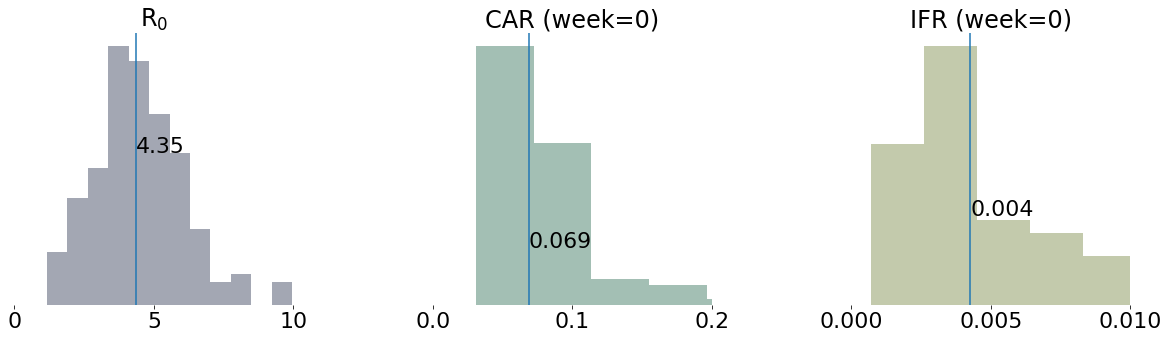

In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return
             
fs=24

theta_ = ["R0","car (week 0)","ifr (week 0)"]
label_ = [r'R$_{0}$','CAR (week=0)','IFR (week=0)']
xticks_ = [[0,5,10],[0,0.1,0.2],[0,0.005,0.01]]
# xlim_ = [[0,5,10],[0,1,2],[0,0.5,1],[0,2,5]]

def histrois(ax,theta,label,histcolor,xticks):
    x = []
    dfbest = pd.read_csv("../postfit_derivatives/"+theta+"_summary.csv")
    for roi in rois:
        model = dfbest.loc[(dfbest.Region==roi), "Model"].values[0] + "_fit_table.csv"
        df = pd.read_csv(datapath + model)
        try:
            x2 = df.loc[(df.roi==roi)&(df['quantile']==0.5), theta].values[0]
            if np.isfinite(x2):
                if theta in ["car (week 0)","ifr (week 0)"]:
                    x.append(x2)
                else:
                    x.append(x2)
        except:
            print()
    mu = np.median(x)
    print(mu)
    f = sns.distplot(x,hist=True,kde=False,ax=ax,color=histcolor)
    simpleaxis(ax)
    ax.set_title(label,fontsize=fs)
    ax.axvline(mu)
    ax.text(mu,20,str(np.round(mu,3)))
    ax.get_yaxis().set_visible(False)
    ax.set_xticks(xticks)
    ax.set_xlim((min(xticks),max(xticks)))
    return
    
f,ax = plt.subplots(1,3,figsize=(20,5))
c_ = sns.color_palette("cubehelix")
for i in range(len(theta_)):
    histrois(ax.flatten()[i],theta_[i],label_[i],c_[i],xticks_[i])
        
plt.subplots_adjust(wspace=0.5)
plt.savefig('../postfit_derivatives/fig_regionaverages.png')